In [2]:
# Standard libraries
import numpy as np
import pandas as pd
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
# Functions created
from kcc_functions import *
# Plotting libraries
import matplotlib.pyplot as plt 
import seaborn as sns
# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# Datetime libraries
import datetime as dt

## 0. Importing dataset and general settings

In [3]:
# Reading csv
df_locations = pd.read_csv('KCC_Analytical_Assessment_Data.csv')
df_locations.columns

Index(['LocationID', 'Portfolio', 'State', 'County', 'PostalCode',
       'Building Value', 'Other Value', 'Contents Value', 'Time Element Value',
       'Occupancy Code', 'Construction Code', 'Stories', 'Year Built', 'AAL'],
      dtype='object')

### Fromatting columns and assigning index col

In [4]:
# Converte column name in lowercase and remove any spaces
df_locations.columns = [x.lower().strip().replace(' ', '_') for x in df_locations.columns]
df_locations.rename(columns = {'locationid': 'id'}, inplace=True)
df_locations.set_index('id', inplace=True)
df_locations.head()

,portfolio,state,county,postalcode,building_value,other_value,contents_value,time_element_value,occupancy_code,construction_code,stories,year_built,aal
id,,,,,,,,,,,,,
1,1,CO,Adams,80640,466981,83008,540206,162719,ATC-02,Wood Frame,1,1951.0,12629.37312
2,1,NY,Albany,12023,64173,0,58981,33734,ATC-01,MH00,1,1979.0,1863.82944
3,1,NY,Allegany,14895,1979933,37751,693251,1113407,ATC-02,MS00,5+,2002.0,11014.10496
4,1,NY,Allegany,14711,340721,86796,893703,352242,ATC-01,Wood Frame,1,2015.0,9639.14112
5,1,PA,Allegheny,15049,770678,14941,563245,112326,ATC-02,WD10,2,1963.0,8767.14000


## 1. Exploratory data analysis and data cleaning

### Creating Risk Count variable

Assumed to be 1 for all locations

In [5]:
df_locations['risk_count'] = 1

### Statistical summary

summary_stats function was created to display a summary of the most important features of our variables

In [6]:
summary_stats(df_locations, 'Summary of statistics')

                                                 Summary of statistics                                                  


,count,mean,std,min,25%,50%,75%,max,Missing vals,# missing,Variable type
aal,49268.0,17461.41,11651.72,773.53,9712.76,14474.73,21749.70,99533.71,False,0,float64
building_value,49268.0,2241552.30,2706162.58,50000.00,470555.25,927804.00,2985167.75,9999611.00,False,0,int64
construction_code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0,object
contents_value,49268.0,1330657.45,1257240.06,10131.00,430911.00,841083.00,1787279.25,4999454.00,False,0,int64
county,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0,object
occupancy_code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0,object
other_value,49268.0,51249.96,28800.22,0.00,27473.00,51827.00,76056.75,99994.00,False,0,int64
portfolio,49268.0,1.50,0.50,1.00,1.00,2.00,2.00,2.00,False,0,int64
postalcode,49268.0,42265.10,27071.25,501.00,14850.00,45745.00,62675.00,88595.00,False,0,int64
risk_count,49268.0,1.00,0.00,1.00,1.00,1.00,1.00,1.00,False,0,int64


### Data types
In terms of data types, most of the variable make logical sense. The only case where there is an issue is with the stories column. It is something to keep in mind during the data cleaning process.

### Handling missing values

Stories and year built are the only variables that contain any missing values, with 2 and one cases respectively

**Stories missing values**

We are going to fill missing values with a 0 righ now and create a Machine Learning model of clustering to fill this values later

In [7]:
df_locations['stories'] = df_locations['stories'].fillna('0')

**year_built**

We could use a bunch of different methods to estimate the age as well of the building based on the rest of the variables. For now we will just ignore it and replace it with a generic 2000, since it is only one observation, and store it in a variable called missing_year and see if we can fill it later in the analysis. id 8343.

In [8]:
df_locations['year_built'] = df_locations['year_built'].fillna(2000)

### Individual variables analysis

**portfolio**
Balanced portfolio

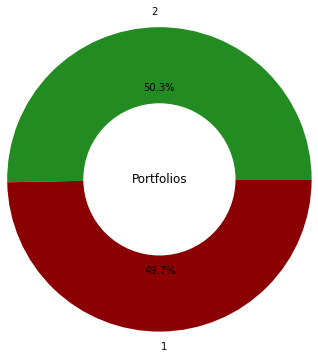

In [9]:
df_locations['portfolio'].unique()

plot_piechart(df_locations, 'portfolio', colors=['forestgreen', 'darkred'], title='Portfolios')

**state**

Number of states: 10
['CO', 'NY', 'PA', 'TX', 'OH', 'MA', 'MI', 'WI', 'NJ', 'IL']


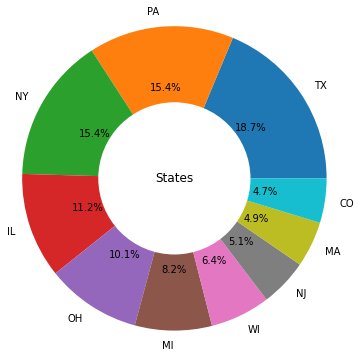

In [10]:
# Analyzing number of states
print('Number of states:', len(df_locations['state'].unique()))
print([x for x in df_locations['state'].unique()])
plot_piechart(df_locations, 'state', title='States')

**county**

647 different counties

In [11]:
len(df_locations['county'].unique())

647

**insured values**

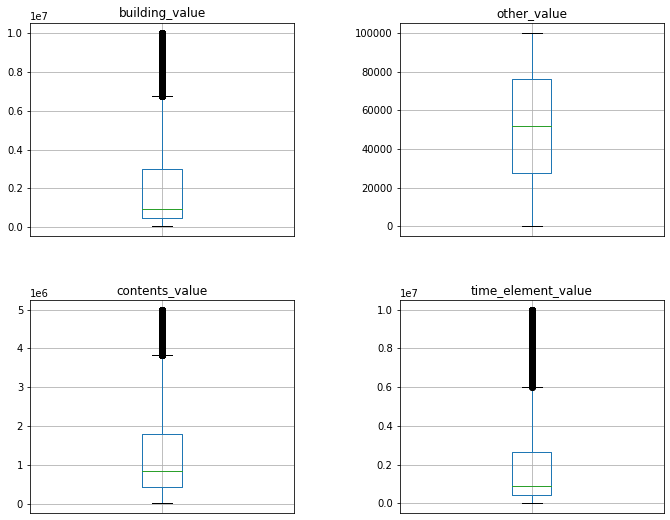

In [12]:
values = ['building_value', 'other_value', 'contents_value', 'time_element_value']
plot_boxes(df_locations[values], rows=2, cols=2)

**occupancy code**

Four codes evenly balanced

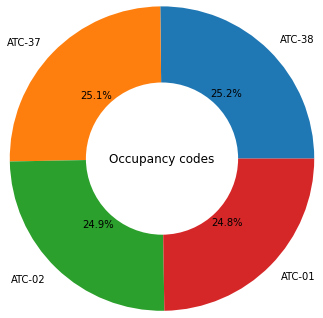

In [13]:
plot_piechart(df_locations, 'occupancy_code', 'Occupancy codes')

**construction code**

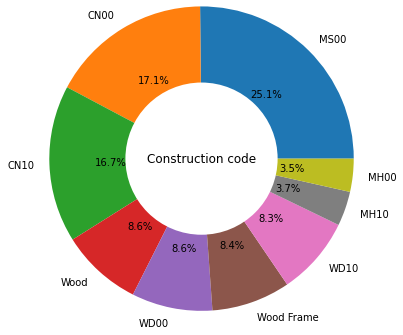

In [14]:
plot_piechart(df_locations, 'construction_code', title='Construction code')

**stories**
We have 2 issues:

- Data groups values higuer than 5 with 5+

- Data groups values higuer than 10 with 'Over 10'

KCC has its own way to segment stories as follows:

• Small: Buildings with 1 to 3 stories

• Medium: Buildings with 4 to 7 stories

• Large: Buildings with 8 or more stories

So, we will follow this rule:
5+ will be classified as medium and over 10 as large. 

A new cathegorical feature will be created for each of the clusters. 


In [15]:
# Replacing 5+ and over 10
df_locations['stories'] = df_locations['stories'].replace('5+', '6')
df_locations['stories'] = df_locations['stories'].replace('Over 10', '11')
# Convert to integers
df_locations['stories'] = df_locations['stories'].astype(int)
# Creating new columns
df_locations['stories_small'] = df_locations['stories'].apply(lambda x: 1 if x <= 3 else 0)
df_locations['stories_medium'] = df_locations['stories'].apply(lambda x: 1 if x >= 3 and x < 8 else 0)
df_locations['stories_large'] = df_locations['stories'].apply(lambda x: 1 if x >= 8 else 0)

df_locations.head()


,portfolio,state,county,postalcode,building_value,other_value,contents_value,time_element_value,occupancy_code,construction_code,stories,year_built,aal,risk_count,stories_small,stories_medium,stories_large
id,,,,,,,,,,,,,,,,,
1,1,CO,Adams,80640,466981,83008,540206,162719,ATC-02,Wood Frame,1,1951.0,12629.37312,1,1,0,0
2,1,NY,Albany,12023,64173,0,58981,33734,ATC-01,MH00,1,1979.0,1863.82944,1,1,0,0
3,1,NY,Allegany,14895,1979933,37751,693251,1113407,ATC-02,MS00,6,2002.0,11014.10496,1,0,1,0
4,1,NY,Allegany,14711,340721,86796,893703,352242,ATC-01,Wood Frame,1,2015.0,9639.14112,1,1,0,0
5,1,PA,Allegheny,15049,770678,14941,563245,112326,ATC-02,WD10,2,1963.0,8767.14000,1,1,0,0


**year built**

We are substituting the year built variable for the age of the building today, generating variable age

In [16]:
# Generate age
df_locations['age'] = 2022 - df_locations['year_built']
df_locations.head()

,portfolio,state,county,postalcode,building_value,other_value,contents_value,time_element_value,occupancy_code,construction_code,stories,year_built,aal,risk_count,stories_small,stories_medium,stories_large,age
id,,,,,,,,,,,,,,,,,,
1,1,CO,Adams,80640,466981,83008,540206,162719,ATC-02,Wood Frame,1,1951.0,12629.37312,1,1,0,0,71.0
2,1,NY,Albany,12023,64173,0,58981,33734,ATC-01,MH00,1,1979.0,1863.82944,1,1,0,0,43.0
3,1,NY,Allegany,14895,1979933,37751,693251,1113407,ATC-02,MS00,6,2002.0,11014.10496,1,0,1,0,20.0
4,1,NY,Allegany,14711,340721,86796,893703,352242,ATC-01,Wood Frame,1,2015.0,9639.14112,1,1,0,0,7.0
5,1,PA,Allegheny,15049,770678,14941,563245,112326,ATC-02,WD10,2,1963.0,8767.14000,1,1,0,0,59.0


**aal**

<AxesSubplot:>

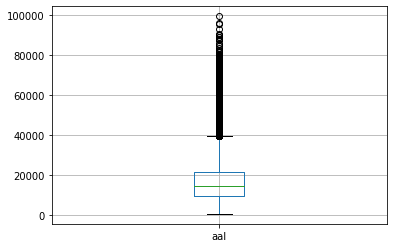

In [17]:
pd.DataFrame(df_locations['aal']).boxplot()

In [18]:
summary_stats(df_locations, '')

,count,mean,std,min,25%,50%,75%,max,Missing vals,# missing,Variable type
aal,49268.0,17461.41,11651.72,773.53,9712.76,14474.73,21749.70,99533.71,False,0,float64
age,49268.0,37.61,20.15,3.00,20.00,38.00,55.00,72.00,False,0,float64
building_value,49268.0,2241552.30,2706162.58,50000.00,470555.25,927804.00,2985167.75,9999611.00,False,0,int64
construction_code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0,object
contents_value,49268.0,1330657.45,1257240.06,10131.00,430911.00,841083.00,1787279.25,4999454.00,False,0,int64
county,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0,object
occupancy_code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0,object
other_value,49268.0,51249.96,28800.22,0.00,27473.00,51827.00,76056.75,99994.00,False,0,int64
portfolio,49268.0,1.50,0.50,1.00,1.00,2.00,2.00,2.00,False,0,int64
postalcode,49268.0,42265.10,27071.25,501.00,14850.00,45745.00,62675.00,88595.00,False,0,int64


### Estimating missing values of stories

In [19]:
df_locations[df_locations['stories'] == 0]

,portfolio,state,county,postalcode,building_value,other_value,contents_value,time_element_value,occupancy_code,construction_code,stories,year_built,aal,risk_count,stories_small,stories_medium,stories_large,age
id,,,,,,,,,,,,,,,,,,
19051,1,TX,Leon,75855,529345,83244,749122,551313,ATC-01,WD00,0,2007.0,9182.5152,1,1,0,0,15.0
43826,2,PA,Lehigh,18102,2965455,91996,1391333,7308586,ATC-38,CN10,0,1968.0,12697.9596,1,1,0,0,54.0


In [20]:
from sklearn.cluster import KMeans
# Creating variables to use in the model
model_columns = ['portfolio', 'building_value',
       'other_value', 'contents_value', 'time_element_value',
       'aal', 'risk_count', 'stories_small',
       'stories_medium', 'stories_large']

# Dummy dataset to cluster stories
data_kmeans = df_locations[model_columns]

# Creating model and fitting with data
kmeans = KMeans(n_clusters=3, random_state=0).fit(data_kmeans)

# Adding cluster column to dataframe
data_kmeans['cluster_stories'] = np.array(kmeans.labels_)

# Predicting missing value result is cluster 0
x1 = kmeans.predict(pd.DataFrame(df_locations.iloc[19051]).transpose()[model_columns])
# Predicting missing value result is cluster 0
x2 = kmeans.predict(pd.DataFrame(df_locations.iloc[43826]).transpose()[model_columns])

# Members of cluster 0
c_0 = data_kmeans[data_kmeans['cluster_stories'] == 0].index 

# Calculating avg mean of cluster 0 
mean_0 = df_locations.iloc[c_0]['stories'].mean()

# Adding projected stories
df_locations.loc[19051, 'stories'] = int(mean_0)
df_locations.loc[43826, 'stories'] = int(mean_0)

### Estimating missing value of age
We are going to create a simple unsupervised Machine Learning model to cluster locations in age clusters, and we are going to predict the missing value and use the mean value of its cluster.

In [21]:
from sklearn.cluster import KMeans
# Creating variables to use in the model
model_columns = ['portfolio', 'building_value',
       'other_value', 'contents_value', 'time_element_value',
       'aal', 'risk_count', 'stories_small',
       'stories_medium', 'stories_large']

# Dummy dataset to cluster ages
data_kmeans = df_locations[df_locations['stories'] != 0][model_columns]            # Dropping variables to predict

# Creating model and fitting with data
kmeans = KMeans(n_clusters=5, random_state=0).fit(data_kmeans)

# Adding cluster column to dataframe
data_kmeans['cluster_age'] = np.array(kmeans.labels_)

# Predicting missing value result is cluster 0
kmeans.predict(pd.DataFrame(df_locations.iloc[8343]).transpose()[model_columns])

# Members of cluster 0
c_0 = data_kmeans[data_kmeans['cluster_age'] == 0].index 

# Calculating avg mean of cluster 0 = 37.6 round to 37
df_locations.iloc[c_0]['age'].mean()

# Adding projected age
df_locations.loc[8343, 'age'] = 37

# Dropping age column
df_locations.drop(columns=['year_built'], inplace=True)


In [22]:
summary_stats(df_locations, '')

,count,mean,std,min,25%,50%,75%,max,Missing vals,# missing,Variable type
aal,49268.0,17461.41,11651.72,773.53,9712.76,14474.73,21749.70,99533.71,False,0,float64
age,49268.0,37.61,20.15,3.00,20.00,38.00,55.00,72.00,False,0,float64
building_value,49268.0,2241552.30,2706162.58,50000.00,470555.25,927804.00,2985167.75,9999611.00,False,0,int64
construction_code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0,object
contents_value,49268.0,1330657.45,1257240.06,10131.00,430911.00,841083.00,1787279.25,4999454.00,False,0,int64
county,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0,object
occupancy_code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0,object
other_value,49268.0,51249.96,28800.22,0.00,27473.00,51827.00,76056.75,99994.00,False,0,int64
portfolio,49268.0,1.50,0.50,1.00,1.00,2.00,2.00,2.00,False,0,int64
postalcode,49268.0,42265.10,27071.25,501.00,14850.00,45745.00,62675.00,88595.00,False,0,int64


### Exporting clean data to excel

In [23]:
df_locations.to_excel('assets/clean_data.xlsx')

## 2. Tasks
### 2.1. For each state in the output file, find the total insured value (TIV) and number of risks.

In [24]:
# Generate total insured value
df_locations['total_insured_value'] = df_locations['building_value'] + df_locations['other_value'] + df_locations['contents_value']
# Group by state
df_locations.groupby('state').agg({'total_insured_value' : np.sum, 'risk_count' : np.sum})

,total_insured_value,risk_count
state,,
CO,8381670421,2320
IL,19511714444,5517
MA,8646207492,2399
MI,14541812546,4025
NJ,9031428098,2502
NY,27698820121,7583
OH,18039111647,4967
PA,27386215362,7596
TX,33998916736,9224


### 2.2. Which 5 counties contain the largest total insured value (TIV) for construction code WD10?

In [25]:
# Quering construction code
# Grouping by state over TIV
df_locations[df_locations['construction_code'] == 'WD10'].groupby('county').agg(
            {'total_insured_value': np.sum}).sort_values(by='total_insured_value', ascending=False).head(5)

,total_insured_value
county,
Harris,81354761
Cook,72348861
Franklin,70348883
El Paso,63557246
Montgomery,61913991


### 2.3. For each portfolio, find the 10 postal codes that are the most susceptible to damage from winter storms. 

In [26]:
frames = []
for portfolio in range(1,3):
    frames.append(df_locations[df_locations['portfolio'] == portfolio].groupby('postalcode').agg(
                                                    {'risk_count': np.sum}).sort_values(by='risk_count', ascending=False).head(10))
print('Total risks by postal code: Portfolio 1')
frames[0]

Total risks by postal code: Portfolio 1


,risk_count
postalcode,
43787,9
78296,8
1355,8
80916,7
62340,7
62473,7
43462,7
11766,7
11757,7


In [27]:
print('Total risks by postal code: Portfolio 2')
frames[1]

Total risks by postal code: Portfolio 2


,risk_count
postalcode,
8869,8
49915,8
53047,7
77067,7
14885,7
45690,7
15475,7
14716,7
14653,7


In [28]:
# Quering for state PA
df_pa = df_locations[df_locations['state'] == 'PA']
# Creating list of all building heigh variables created
height_cols = ['stories_small', 'stories_medium', 'stories_large']
# Creating empy list of frames
frames = []
# Looping through buulding heights and creating groups
for col in height_cols:
    grouped_df = df_pa[df_pa[col] == 1].groupby('postalcode').agg(
                                        {'total_insured_value': np.sum, 'risk_count': np.sum, 'aal': np.sum})

    columns = [(col, 'TIV'), (col, 'Risk count'), (col, 'AAL')]
    grouped_df.columns = pd.MultiIndex.from_tuples(columns)
    frames.append(grouped_df)


In [29]:
df_pa = pd.concat(frames, axis=1)
df_pa

stories_small                        stories_medium             \
                     TIV Risk count         AAL            TIV Risk count   
postalcode                                                                  
15001         16574821.0        3.0  60843.6432            NaN        NaN   
15003          2639644.0        3.0  25498.6124      2500250.0        1.0   
15004          3545578.0        2.0  37207.6006      3139157.0        1.0   
15005         10235838.0        4.0  59483.4088            NaN        NaN   
15006          1332561.0        1.0  10449.9600      1544564.0        1.0   
...                  ...        ...         ...            ...        ...   
17506                NaN        NaN         NaN            NaN        NaN   
17721                NaN        NaN         NaN            NaN        NaN   
18025                NaN        NaN         NaN            NaN        NaN   
18352                NaN        NaN         NaN            NaN        NaN   
18465                NaN        NaN         NaN            NaN        NaN   

                      stories_large                          
                  AAL           TIV Risk count          AAL  
postalcode                                                   
15001             NaN     6389622.0        1.0  15290.65120  
15003       22535.532           NaN        NaN          NaN  
15004       25672.141           NaN        NaN          NaN  
15005             NaN           NaN        NaN          NaN  
15006       16795.150           NaN        NaN          NaN  
...               ...           ...        ...          ...  
17506             NaN    10944468.0        1.0  23300.78976  
17721             NaN     8178343.0        1.0  31704.40704  
18025             NaN     5757247.0        2.0  32213.99600  
18352             NaN     6785886.0        1.0  17781.67936  
18465             NaN    12297387.0        1.0  50562.36480  

[2119 rows x 9 columns]

In [30]:
df_pa.to_excel('assets/PA_postal_codes.xlsx')

## 3. Questions

### 3.1 Does one of the portfolios appear to be more vulnerable to damage from winter storm? If so, which one? Explain your reasoning and any analysis you conducted to support your conclusion.

From the exploratory data analysis, we saw that the both portfolios own almost the exact same percentage of the total locations, making us believe that the risk count would be similar and therefore both portfolio represent the same risk. However, that approach is not taking into consideration some key factors:
- The total insured value of the porperty: we cannot assign the same risk to a location insured for USD 500,000 as to a propoerty insured for USD 5 million. 
- Snow frequency: a property does not represent the same risk of loss during a snowstorm if it is in a state where hardly ever snows, such as TX, than if it is located in a state such as NY. To account for this, we retrieved information about the average snow in inches by state from usa.com and added it to the main dataframe. 
- AAL of the location: there are locations that historically have represented higher losses anually than others. 
- Distribution of propoerty values between portfolios: we can show that portfolio 2 contains around 83% of the TIV, meaning that porfolio 2 represents a higues monetary risk than portfolio 1 does. 

To get to total risk for each portfolio, we have created a weighted index of the TIV. This index is calculated by weighting TIV by the Average Anual Loss and by the average snow of the state. 

Once we see the percentage that each portfolio represents of this weighted TIV, it is easy to conclude that porfolio two represents 89% of the risk and porfolio 1 only 11%, making portfolio 2 the riskier of the two.

In [31]:
# Create frame with avg snow by state according to usa.com
df_snowfall = [['CO', 'NY', 'PA', 'TX', 'OH', 'MA', 'MI', 'WI', 'NJ', 'IL'],
                [67.30, 55.32, 35.84, 1.36, 26.63, 51.05, 60.66, 45.79, 23.73, 21.75]]
df_snowfall = pd.DataFrame(df_snowfall).transpose()
df_snowfall.columns = ['state', 'avg_snow']
# Merge datasets
df_locations = df_locations.merge(df_snowfall, how='left', on='state')

In [41]:
# Assign weights for aal
df_locations['weight_aal'] = df_locations['aal'] / df_locations['aal'].sum()
# Assign weights for avg snow
df_locations['weight_snow'] = df_locations['avg_snow'] / df_locations['avg_snow'].sum()
# Calculate weighted aal for each location
df_locations['weighted_TIV'] = df_locations['total_insured_value'] * df_locations['weight_aal'] * df_locations['weight_snow']
# Portfolio risks
type_frequencies = df_locations.groupby('portfolio').agg({'weighted_TIV': np.sum})

Text(0.5, 0.45, 'Weighted TIV')

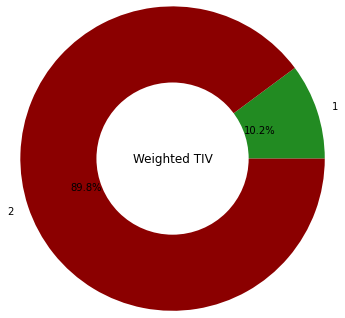

In [33]:
 # Plot pie chart
labels = type_frequencies.index
fig, ax = plt.subplots()
ax.pie(type_frequencies['weighted_TIV'], labels=labels, 
        autopct='%1.1f%%', radius=2, colors=['forestgreen', 'darkred'])
fig.set_size_inches(3.5,3.5)
circle = plt.Circle(xy=(0,0), radius=1, facecolor='White')
plt.gca().add_artist(circle)
ax.set_title('Weighted TIV', y=0.45)
 

### 3.2 Which factors appear to have the greatest influence on AAL? Explain your reasoning and any analysis you conducted to support your conclusion.